#  Solution (using KNN classification)

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('robot.xlsx')

In [3]:
df.head()

,r_number,speed (m/s),weight (kg),qualified
0,1,2.50,600,No
1,2,3.75,800,No
2,3,2.25,550,No
3,4,3.25,825,No
4,5,2.75,750,No


In [4]:
# since the model only interprets numerical data, we replace the qualified column with numerical values
df['qualified'] = df['qualified'].replace(['No', 'Yes'], [0,1])
df.head()

,r_number,speed (m/s),weight (kg),qualified
0,1,2.50,600,0
1,2,3.75,800,0
2,3,2.25,550,0
3,4,3.25,825,0
4,5,2.75,750,0


In [5]:
# taking the X and y values
X = df.iloc[:, [1,2]].values
print(X)

[[  2.5  600.  ]
 [  3.75 800.  ]
 [  2.25 550.  ]
 [  3.25 825.  ]
 [  2.75 750.  ]
 [  4.5  500.  ]
 [  3.5  525.  ]
 [  3.   325.  ]
 [  4.   400.  ]
 [  4.25 375.  ]
 [  2.   200.  ]
 [  5.   250.  ]
 [  8.25 850.  ]
 [  5.75 875.  ]
 [  4.75 625.  ]
 [  5.5  675.  ]
 [  5.25 950.  ]
 [  7.   425.  ]
 [  7.5  800.  ]
 [  7.25 575.  ]]


In [6]:
y = df.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [7]:
# import the needed sklearn libraries
from sklearn.neighbors import KNeighborsClassifier  # importing the classifier
from sklearn import metrics  # import the needed metrics to calculate the confusion matrix and accuracy
from sklearn.preprocessing import StandardScaler  # to scale the X values
from sklearn.model_selection import train_test_split  # splitting the data into training and testing sets

In [22]:
# splitting X and y data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
# scaling the X values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [27]:
print(X_train)

[[-1.37320266 -1.71372656]
 [ 1.55629635 -0.70234695]
 [-0.49435296 -0.2528449 ]
 [ 0.8239216   1.32041227]
 [-0.93377781  0.75853471]
 [-1.22672771 -0.14046939]
 [ 0.09154684 -0.36522041]
 [ 0.23802179  0.19665715]
 [-0.05492811 -0.92709797]
 [-0.78730286 -1.151849  ]
 [ 0.5309717   1.6575388 ]
 [ 0.38449675 -1.48897554]
 [-0.64082791  1.09566124]
 [-1.08025276  0.08428163]
 [ 0.67744665  0.42140817]
 [ 2.2886711   1.20803676]]


In [28]:
print(X_test)

[[ 1.06870575  0.92976   ]
 [-1.06870575  0.92976   ]
 [ 0.92621165 -0.4090944 ]
 [-0.92621165 -1.45042561]]


In [37]:
# create, train and test the model
K = []
train = []
test = []
score = {}
accuracy = []
for k in range(1,16):
    K.append(k)                                               # fill the list with the k values (1-10)
    clf = KNeighborsClassifier(n_neighbors=k)                 # create the model
    clf.fit(X_train, y_train)                                 # train the model
    
    y_pred = clf.predict(X_test)                              # testing the model
   
    train_score = clf.score(X_train, y_train)                 # get the training score
    test_score = clf.score(X_test, y_test)                    # get the test score
    acc = metrics.accuracy_score(y_test, y_pred)              # get the accuracy (which is same as test score)
    
    train.append(train_score)                                 # put the train scores in the train list
    test.append(test_score)                                   # put the test scores in the test list
    score[k] = [train_score, test_score]                      # placing it in the scores dictionary
    accuracy.append(acc)                                      # placing it in the accuracy list

In [38]:
train

[1.0,
 0.9375,
 0.9375,
 0.8125,
 0.875,
 0.8125,
 0.8125,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875,
 0.6875]

In [39]:
test

[1.0,
 0.75,
 1.0,
 1.0,
 1.0,
 0.75,
 0.75,
 0.75,
 0.75,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5]

In [40]:
accuracy

[1.0,
 0.75,
 1.0,
 1.0,
 1.0,
 0.75,
 0.75,
 0.75,
 0.75,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5]

In [41]:
for keys, values in score.items():
    print(f'{keys}:{values}')

1:[1.0, 1.0]
2:[0.9375, 0.75]
3:[0.9375, 1.0]
4:[0.8125, 1.0]
5:[0.875, 1.0]
6:[0.8125, 0.75]
7:[0.8125, 0.75]
8:[0.6875, 0.75]
9:[0.6875, 0.75]
10:[0.6875, 0.5]
11:[0.6875, 0.5]
12:[0.6875, 0.5]
13:[0.6875, 0.5]
14:[0.6875, 0.5]
15:[0.6875, 0.5]


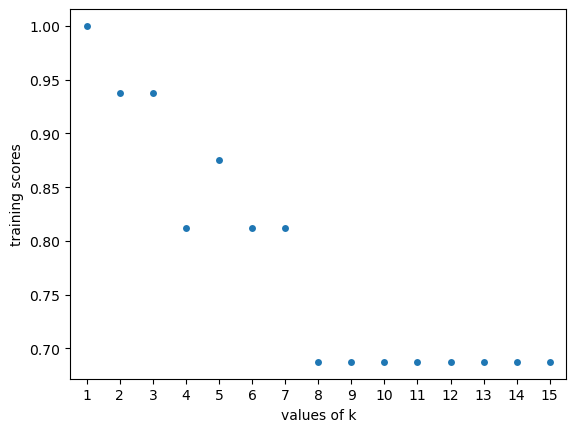

In [42]:
# plotting the strip plot for training values
sns.stripplot(x=K, y=train)
plt.xlabel('values of k')
plt.ylabel('training scores')
plt.show()

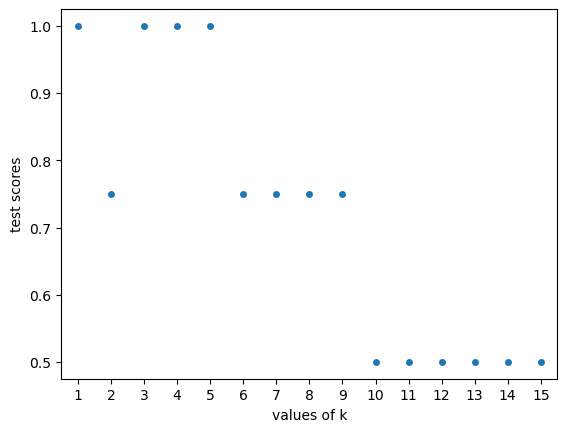

In [43]:
# plotting the strip plot for test values
sns.stripplot(x=K, y=test)
plt.xlabel('values of k')
plt.ylabel('test scores')
plt.show()

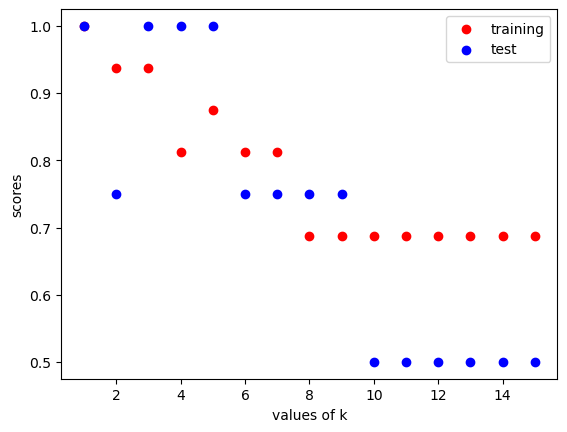

In [44]:
# overlapping plot of training and test values
plt.scatter(K, train, color='r')
plt.scatter(K, test, color='b')
plt.xlabel('values of k')
plt.ylabel('scores')
plt.legend(['training', 'test'])
plt.show()

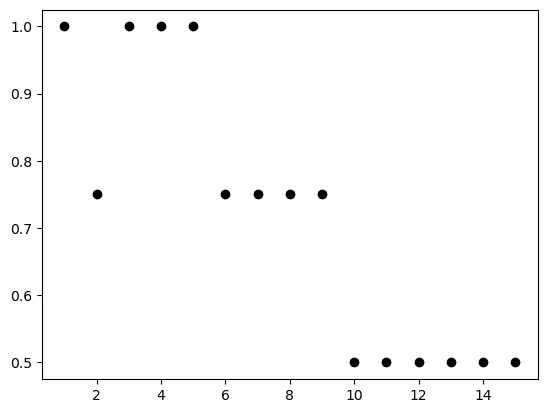

In [45]:
plt.scatter(K,accuracy, color='k')
plt.show()

# from the graph above, the optimum k values are 1, 3, 4, and 5

In [48]:
new_k = [1,3,5]    # k values going to be used
x_new = [[5.20, 500]]
y_new = []
for k in new_k:
    clf_2 = KNeighborsClassifier(n_neighbors=k)
    clf_2.fit(X_train, y_train)
    pred_y = clf_2.predict(x_new)
    y_new.append(pred_y)
print(y_new)

[array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64)]
